In [1]:
%matplotlib inline

import torch
import torchvision
import matplotlib.pyplot as plt

device = None
if torch.cuda.is_available():
    device = torch.device('cuda')
    # device = torch.device('cpu')
else:
    device = torch.device('cpu')

mnist_train = torchvision.datasets.MNIST('', train=True, download=True)
x_train = mnist_train.data.to(device).reshape(-1, 784).float()  # Reshape input
# Create output tensor
y_train = torch.zeros((mnist_train.targets.shape[0], 10), device=device)
y_train[torch.arange(mnist_train.targets.shape[0]),
        mnist_train.targets] = 1  # Populate output

mnist_test = torchvision.datasets.MNIST('', train=False, download=True)
x_test = mnist_test.data.to(device).reshape(-1, 784).float()  # Reshape input
# Create output tensor
y_test = torch.zeros((mnist_test.targets.shape[0], 10), device=device)  
y_test[torch.arange(mnist_test.targets.shape[0]),
       mnist_test.targets] = 1  # Populate output

class HandwrittenNumbersOperatorModel:
    def __init__(self):
        self.W = torch.ones([784, 10], requires_grad=True, device=device)
        self.b = torch.ones([1, 10], requires_grad=True, device=device)

    # Predictor
    def f(self, x):
        return torch.nn.functional.softmax(x @ self.W + self.b, dim=1).to(device)

    # Uses Cross Entropy
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.f(x), y)

    def accuracy(self, x, y):
        return torch.mean(torch.eq(self.f(x).argmax(1), y.argmax(1)).float())



/home/olros/.local/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
model = HandwrittenNumbersOperatorModel()

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.b, model.W], lr=1)
for epoch in range(10_000):
    model.loss(x_train, y_train).backward() # Compute loss gradients
    optimizer.step() # Perform optimization by adjusting W and b
    optimizer.zero_grad() # Clear gradients for next step


Loss = 0.6608109474182129, accuracy = 92.6099956035614%


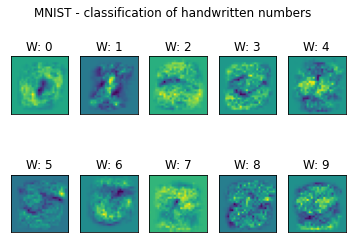

In [3]:
print(f"Loss = {model.loss(x_train, y_train).item()}, accuracy = {model.accuracy(x_test, y_test).item() * 100}%")

fig = plt.figure('Oppgave D')
fig.suptitle('MNIST - classification of handwritten numbers')
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(model.W[:, i].detach().cpu().numpy().reshape(28, 28))
    plt.title(f'W: {i}')
    plt.xticks([])
    plt.yticks([])

plt.show()